In [1]:
import tkinter as tk
from tkinter import filedialog
from textblob import TextBlob
from tkinter import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from string import punctuation
from nltk.corpus import stopwords


In [2]:
main = tk.Tk()
main.title("Analysis of Women Safety in Indian Cities Using Machine Learning on Tweets") #designing main screen
main.geometry("1300x1200")
# main.mainloop()

''

In [3]:
global filename 
tweets_list = [] 
clean_list = []
global pos, neu, neg

In [4]:
# def tweetCleaning(doc):
#     tokens = doc.split()
#     table = str.maketrans('', '', punctuation)
#     tokens=[w.translate(table) for w in tokens]
#     tokens = [word for word in tokens if word.isalpha()]
#     stop_words = set(stopwords.words('english'))
#     tokens =[w for w in tokens if not w in stop_words]
#     tokens = [word for word in tokens if len(word) > 1]
#     tokens = ' '.join(tokens) #here upto for word based
#     return tokens

In [5]:
def tweetCleaning(doc):
    # Tokenize the document
    tokens = word_tokenize(doc.lower())
    
    # Remove punctuation
    table = str.maketrans('', '', string.punctuation)
    tokens = [w.translate(table) for w in tokens]
    
    # Remove non-alphabetic words
    tokens = [word for word in tokens if word.isalpha()]
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    
    # Remove short words
    tokens = [word for word in tokens if len(word) > 1]
    
    # Join tokens back into a single string
    cleaned_doc = ' '.join(tokens)
    
    return cleaned_doc

In [6]:
def upload():
    # Function to upload Twitter profile
    filename = filedialog.askopenfilename(initialdir="dataset", filetypes=(("CSV files", "*csv"),))
    pathlabel.config(text=filename)
    text.delete('1.0', tk.END)
    text.insert(tk.END, filename + " loaded\n")
    
    read(filename)
    # Read the CSV file using pandas
    try:
        df = pd.read_csv(filename)
        
        # Process the data or perform analysis on the DataFrame df as needed
#         df.head()
    except pd.errors.EmptyDataError:
        
        text.insert(tk.END, "Error: Empty CSV file\n")
    except pd.errors.ParserError:
        text.insert(tk.END, "Error: Invalid CSV file\n")

In [7]:
def read(filename):
    text.delete('1.0', tk.END)
    tweets_list.clear()
    train = pd.read_csv(filename, encoding='iso-8859-1')
    for i in range(len(train)):
        tweet = train.loc[i, 'Text']
        tweets_list.append(tweet)
        text.insert(tk.END, tweet + "\n")
    text.insert(tk.END, "\n\nTotal tweets found in dataset: " + str(len(tweets_list)) + "\n\n\n")


In [8]:
def clean():
    text.delete('1.0', END)
    clean_list.clear()
    for i in range(len(tweets_list)):
        tweet = tweets_list[i]
        tweet = tweet.strip("\n")
        tweet = tweet.strip()
        tweet = tweetCleaning(tweet.lower())
    clean_list.append(tweet)
    text.insert(END,tweet+"\n")
    text.insert(END,"\n\nTotal tweets found in dataset is : "+str(len(clean_list))+"\n\n\n")

In [9]:
def machineLearning():
    text.delete('1.0', tk.END)
    global pos, neu, neg
    pos = 0
    neu = 0
    neg = 0
    for i in range(len(tweets_list)):
        tweet = tweets_list[i]
        blob = TextBlob(tweet)
        if blob.polarity <= 0.2:
            neg += 1
            text.insert(tk.END, tweet + "\n")
            text.insert(tk.END, "Predicted Sentiment: NEGATIVE\n")
            text.insert(tk.END, "Polarity Score: " + str(blob.polarity) + "\n")
            text.insert(tk.END, '====================================================================================\n')
        elif blob.polarity > 0.2 and blob.polarity <= 0.5:
            neu += 1
            text.insert(tk.END, tweet + "\n")
            text.insert(tk.END, "Predicted Sentiment: NEUTRAL\n")
            text.insert(tk.END, "Polarity Score: " + str(blob.polarity) + "\n")
        elif blob.polarity > 0.5:
            pos += 1
            text.insert(tk.END, tweet + "\n")
            text.insert(tk.END, "Predicted Sentiment: POSITIVE\n")
            text.insert(tk.END, "Polarity Score: " + str(blob.polarity) + "\n")
            text.insert(tk.END, '====================================================================================\n')


In [10]:

import matplotlib.pyplot as plt

def graph():
    label_X = []
    category_X = []
    text.delete('1.0', tk.END)
    text.insert(tk.END, "SafetyFactor\n\n")
    text.insert(tk.END, 'Positive: ' + str(pos) + "\n")
    text.insert(tk.END, 'Negative: ' + str(neg) + "\n")
    text.insert(tk.END, 'Neutral: ' + str(neu) + "\n\n")
    text.insert(tk.END, 'Total No. of tweets: ' + str(len(tweets_list)) + "\n")

    if len(tweets_list) > 0:
        text.insert(tk.END, 'Positive: ' + str(pos) + ' / ' + str(len(tweets_list)) + ' = ' + str("{:.2f}".format(pos / len(tweets_list) * 100)) + '%\n')
        text.insert(tk.END, 'Negative: ' + str(neg) + ' / ' + str(len(tweets_list)) + ' = ' + str("{:.2f}".format(neg / len(tweets_list) * 100)) + '%\n')
        text.insert(tk.END, 'Neutral: ' + str(neu) + ' / ' + str(len(tweets_list)) + ' = ' +  str("{:.2f}".format(neu / len(tweets_list) * 100))  + '%\n')
    else:
        text.insert(tk.END, 'No tweets found\n')

    label_X.append('Positive')
    label_X.append('Negative')
    label_X.append('Neutral')
    category_X.append(pos)
    category_X.append(neg)
    category_X.append(neu)

    plt.pie(category_X, labels=label_X, autopct='%1.1f%%')
    plt.title('Women Safety & Sentiment Graph')
    plt.axis('equal')
    plt.show()


In [11]:
font = ('times', 16, 'bold')
title = Label(main, text='Analysis of Women Safety in Indian Cities Using Machine Learning on Tweets')
title.config(bg='brown', fg='white')
title.config(font=font)
title.config(height=3, width=120)
title.place(x=0,y=5)

font1 = ('times', 14, 'bold')
uploadButton = Button(main, text="Upload Tweets Dataset", command=upload)
uploadButton.place(x=50,y=100)
uploadButton.config(font=font1)

pathlabel = Label(main)
pathlabel.config(bg='brown', fg='white')
pathlabel.config(font=font1)
pathlabel.place(x=370,y=100)

readButton = Button(main, text="Read Tweets", command=read)
readButton.place(x=50,y=150)
readButton.config(font=font1)

cleanButton = Button(main, text="Tweets Cleaning", command=clean)
cleanButton.place(x=210,y=150)
cleanButton.config(font=font1)

mlButton = Button(main, text="Run Machine Learning Algorithm", command=machineLearning)
mlButton.place(x=400,y=150)
mlButton.config(font=font1)

graphButton = Button(main, text="Women Saftey Graph", command=graph)
graphButton.place(x=730,y=150)
graphButton.config(font=font1)

font1 = ('times', 12, 'bold')
text=Text(main,height=25,width=150)
scroll=Scrollbar(text)
text.configure(yscrollcommand=scroll.set)
text.place(x=10,y=200)
text.config(font=font1)
pathlabel = Label(main)
pathlabel.config(bg='brown', fg='white')
pathlabel.config(font=font1)
pathlabel.place(x=370,y=100)

font1 = ('times', 12, 'bold')
text=Text(main,height=25,width=150)
scroll=Scrollbar(text)
text.configure(yscrollcommand=scroll.set)
text.place(x=10,y=200)
text.config(font=font1)

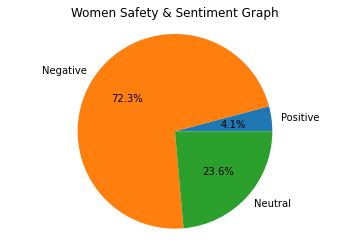

In [ ]:
main.mainloop()

In [13]:
pd.read_excel('MeToo_tweets.xlsx')

,Text,Id,Lenght,Created_at,Source,Favorite_count,Retweet_count,Lang
0,"@Rightsatbirth: ""What he did was manipulative...",1184600000000000000,140,2019-10-16 22:33:00,Twitter for Android,0,2,en
1,Happy 94th Birthday\0\x9f\x8e\x82 to @_AngelaL...,1184600000000000000,144,2019-10-16 22:33:00,Twitter for iPhone,0,0,en
2,@RepLoriTrahan: Two years ago #MeToo woke up ...,1184600000000000000,139,2019-10-16 22:33:00,Twitter for iPhone,0,36,en
3,@RituG15: #TimesUp #MeTooVoter #MenToo #Metoo...,1184600000000000000,139,2019-10-16 22:33:00,Twitter for Android,0,7,en
4,@ambertamblyn: Months before MeToo broke us w...,1184600000000000000,140,2019-10-16 22:33:00,Twitter for iPhone,0,161,en
...,...,...,...,...,...,...,...,...
15049,advocate4victim: #DYK: October 15 is the secon...,1184160000000000000,140,2019-10-15 17:46:00,Twitter for Android,0,3,en
15050,"TaranaBurke: Tonight, on the anniversary of #m...",1184160000000000000,140,2019-10-15 17:46:00,Twitter Web App,0,345,en
15051,Meet Alki David: The self-appointed ambassador...,1184160000000000000,133,2019-10-15 17:46:00,Twitter for iPhone,0,1,en
15052,IreneWoodbury: 2\x80\x9cGreat Read2\x806will l...,1184160000000000000,140,2019-10-15 17:46:00,Twitter for Android,0,17,en
